# Inferring a Handful of Dice

In [1]:
from collections import Counter
from dice_pmf import DicePmf, DiceUtil
import matplotlib.pyplot as plt
import unittest

In [2]:
classes = {name: obj for name, obj in globals().copy().items() if type(obj).__name__ == 'type'}
print(f'INFO: Classes in scope: {list(classes.keys())}')

INFO: Classes in scope: ['Counter', 'DicePmf', 'DiceUtil']


# Main

In [3]:
def main():
    dice = {4: 3, 20: 1}
    dist = Counter(DiceUtil.get_dice_rolls(dice, num_rolls=100_000))
    dpmf_inferred = DicePmf.dice_infer(dist, kind='entropy')
    print(f'Dice={dpmf_inferred.dice}')

In [4]:
main()

d4 ranges from 0 to 5.
d4=0: *......*......*......*......*......*......
d4=1: *......*......*......*......*......*......
d4=2: *......*......*......*......*......*......
d4=3: *......*......*......*......*......*......
d4=4: *......*......*......*......*......*......
d4=5: *......*......*......*......*......*......
Dice={4: 3, 6: 0, 8: 0, 12: 0, 20: 1}


# Show dice probability mass function (pmf)

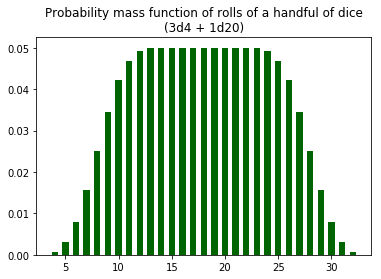

In [5]:
def show_dice_probability_mass_function(dpmf):
    plt.bar(range(dpmf.low, dpmf.high + 1)
        , dpmf.pmf
        , align='center'
        , color='darkgreen'
        , width=0.60
        )
    ax = plt.gca()
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.2f}".format(x)))
    dstr = DiceUtil.dice_str(dpmf.dice)
    plt.title(f'Probability mass function of rolls of a handful of dice\n({dstr})')
    # plt.xticks=[5,10,15,20,25,30,35,40,45]
    plt.show()
        
dpmf = DicePmf({4: 3, 20: 1})
show_dice_probability_mass_function(dpmf)

# Show observed distribution

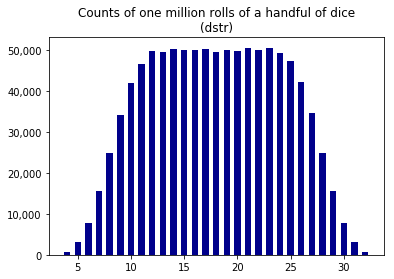

In [6]:
def show_observed_distribution(dist, dstr):
    x = dist.keys()
    y = dist.values()
    plt.bar(x, y, align='center', color='darkblue', width=0.60)
    ax = plt.gca()
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    plt.title('Counts of one million rolls of a handful of dice\n(dstr)')
    # plt.xticks=[5,10,15,20,25,30,35,40,45]
    plt.show()
        
dice = {4: 3, 20: 1}
dist = Counter(DiceUtil.get_dice_rolls(dice, num_rolls=1_000_000))
show_observed_distribution(dist, DiceUtil.dice_str(dice))